# Ensemble Methods: Decision Trees, Bagging, and Random Forests

- Run a single decision tree and visualize it.
- Run bagging (Bootstrap Aggregation) using multiple decision trees.
- Run a Random Forest, and display feature importances.

## Part 1: Demonstration on a Toy Dataset

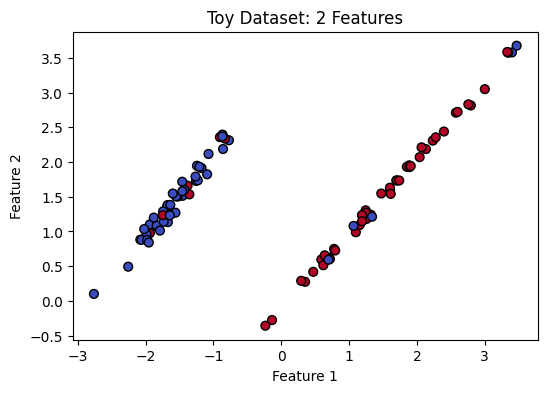

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

### Create a toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1, class_sep=1.5, random_state=42)

# Visualize the toy dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor="k", s=40)
plt.title('Toy Dataset: 2 Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 1. Single Decision Tree

We first train a single decision tree on the toy dataset and visualize it.

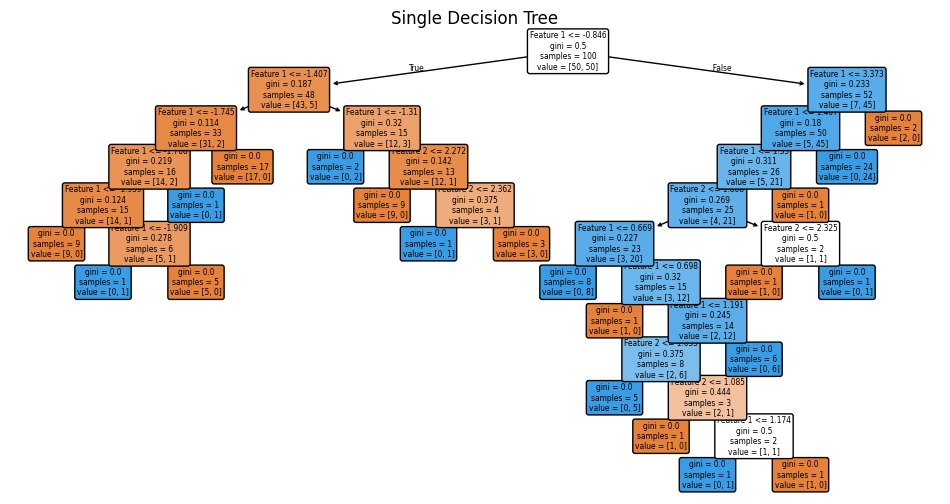

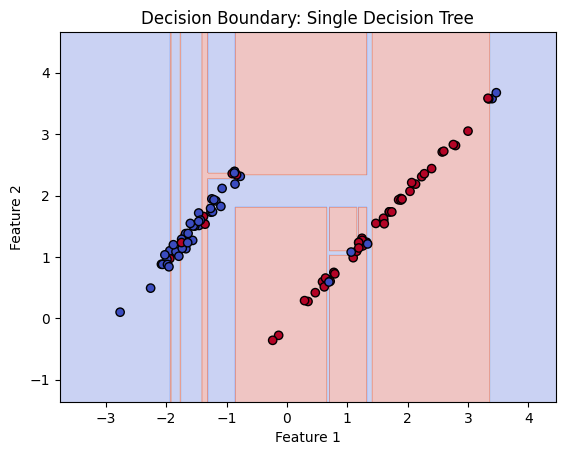

In [2]:
# Train a single Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Visualize the tree structure
plt.figure(figsize=(12,6))
plot_tree(tree_clf, feature_names=['Feature 1','Feature 2'], filled=True, rounded=True)
plt.title('Single Decision Tree')
plt.show()

# Plot decision boundary for the decision tree

def plot_decision_boundary(clf, X, y, title="Decision Boundary", mesh_step=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                         np.arange(y_min, y_max, mesh_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(tree_clf, X, y, title="Decision Boundary: Single Decision Tree")

### 2. Bagging

Next, we demonstrate Bagging using an ensemble of decision trees. The `BaggingClassifier` builds multiple trees on bootstrap samples and aggregates their predictions.

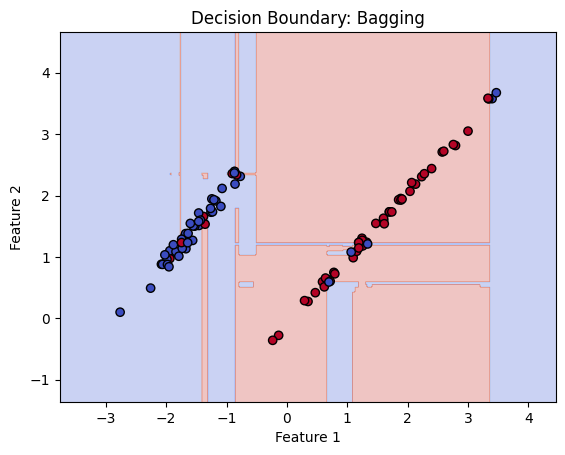

Bagging OOB Score: 0.83


In [3]:
# Bagging example with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    bootstrap=True,
    oob_score=True,
    random_state=42
)
bagging_clf.fit(X, y)

# Plot decision boundary for Bagging
plot_decision_boundary(bagging_clf, X, y, title="Decision Boundary: Bagging")

print("Bagging OOB Score:", bagging_clf.oob_score_)


### 3. Random Forest with Feature Importance

Finally, we train a Random Forest which extends bagging by also selecting a random subset of features at each split. We'll also display the feature importances.

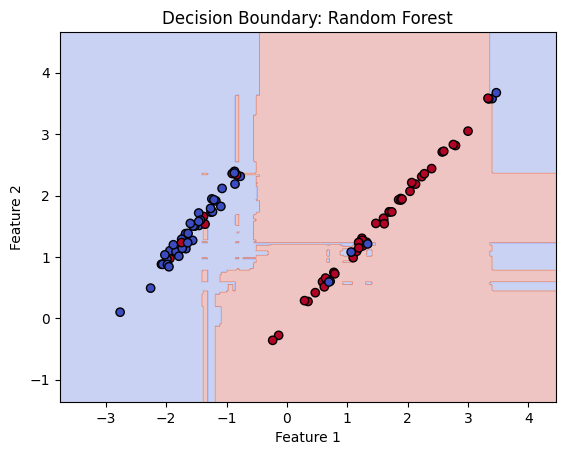

     Feature  Importance
0  Feature 1    0.726614
1  Feature 2    0.273386


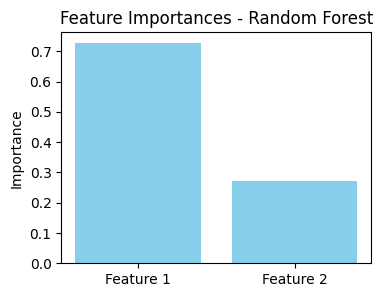

Random Forest OOB Score: 0.85


In [4]:
# Random Forest example
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",  # By default, takes int(sqrt(n_features))
    oob_score=True,
    random_state=42
)
rf_clf.fit(X, y)

# Plot decision boundary for Random Forest
plot_decision_boundary(rf_clf, X, y, title="Decision Boundary: Random Forest")

# Display feature importances
import pandas as pd
feature_names = ['Feature 1', 'Feature 2']
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Optionally, plot feature importances
plt.figure(figsize=(4,3))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance')
plt.show()

print("Random Forest OOB Score:", rf_clf.oob_score_)


## Part 2: Larger Dataset (Iris)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA

# For inline plots in Colab/Jupyter
%matplotlib inline

In [6]:
## Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the Iris data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Display a brief summary of the data
print("Iris dataset shape:", X_iris.shape)
print("Feature names:", iris.feature_names)


Iris dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### EDA (Exploratory Data Analysis)

1. **Visualize Pairwise Relationships:**
   - Use a scatterplot matrix or pair plot to inspect correlations and distributions.
2. **Check the Distribution of Classes:**
   - Plot a bar chart of class frequencies.

Below is an example code snippet to create a pair plot using `pandas` and `seaborn`.

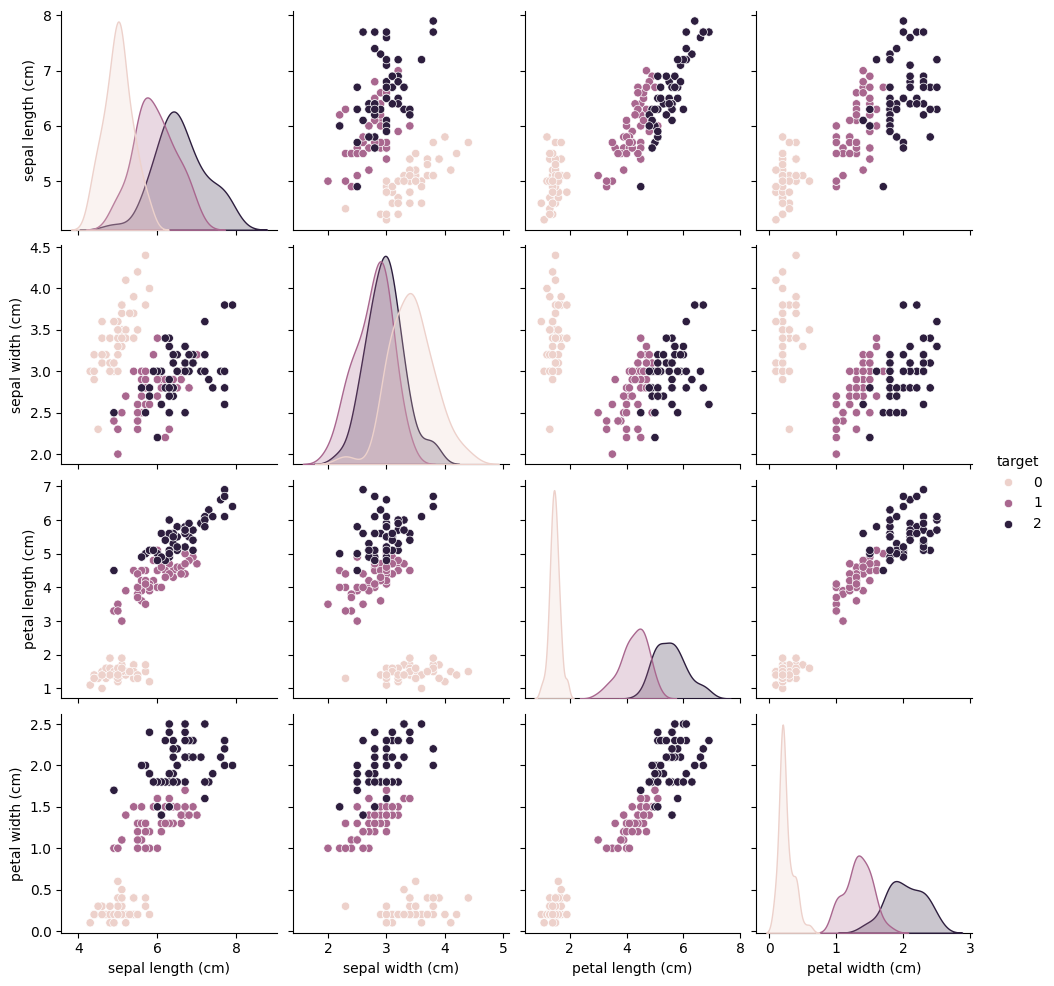

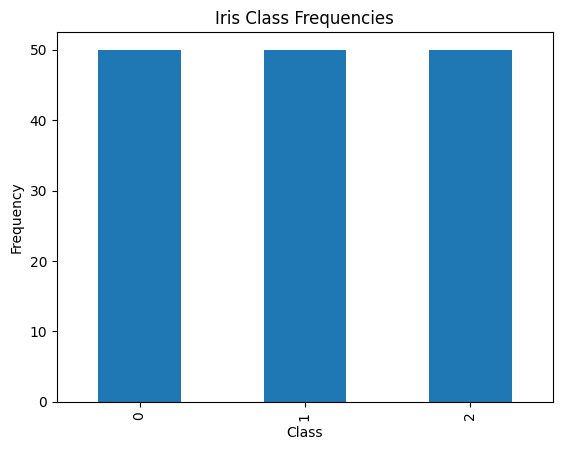

In [7]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for easier visualization
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['target'] = y_iris

# Pair plot
sns.pairplot(iris_df, hue='target')
plt.show()

# Bar plot of class frequencies
iris_df['target'].value_counts().plot(kind='bar')
plt.title('Iris Class Frequencies')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 1. Single Decision Tree on Iris

Train a single decision tree using the Iris dataset, visualize its  structure, and calculate and print accuracy.

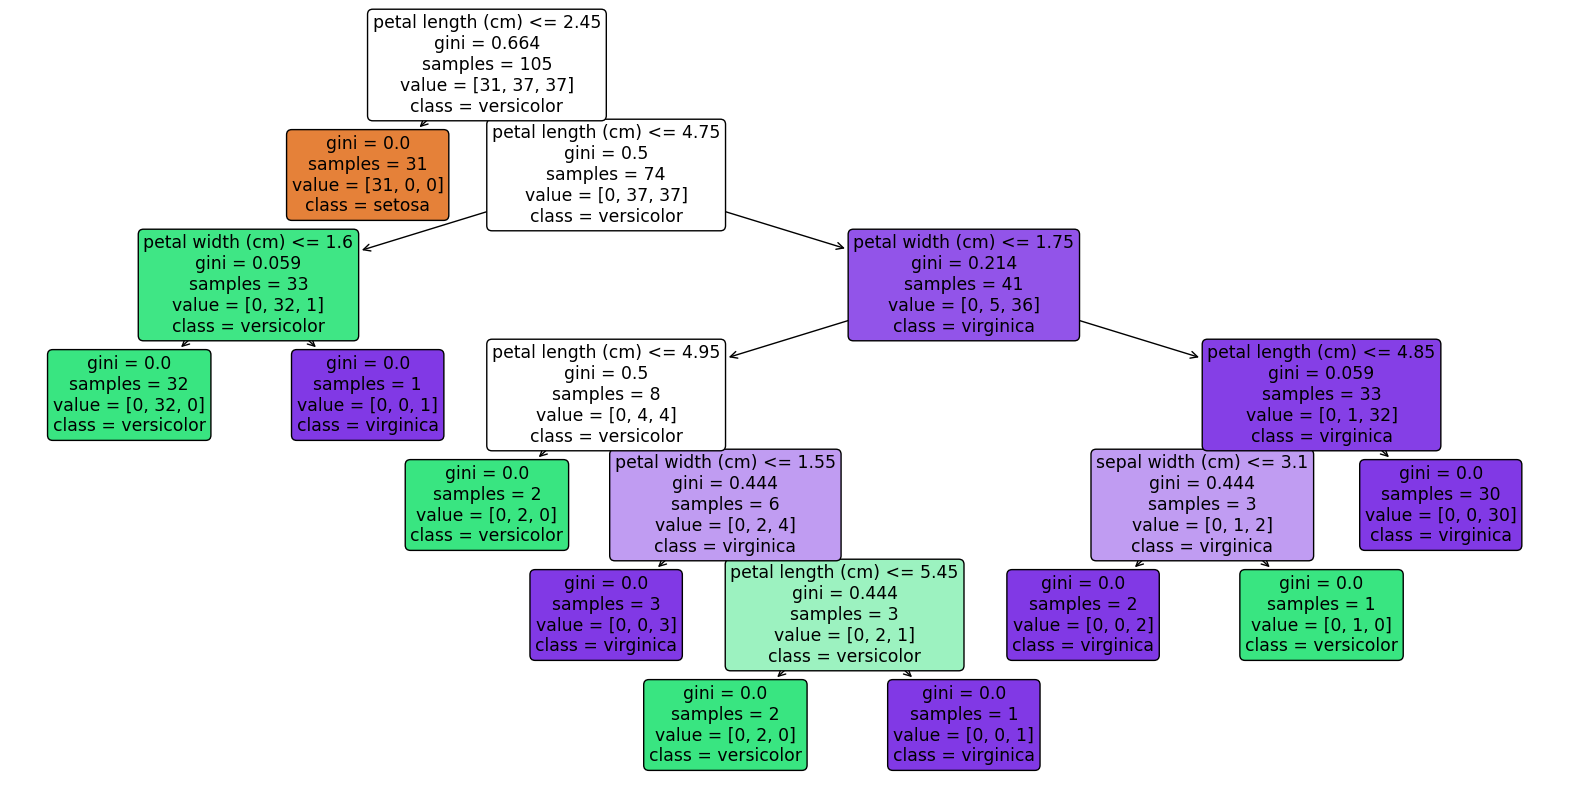

In [11]:
# Train a single Decision Tree
iris_tree_clf = DecisionTreeClassifier(random_state=42)
iris_tree_clf.fit(X_train, y_train)

# Visualize the tree structure (optional, might be large for Iris)
plt.figure(figsize=(20,10))
plot_tree(iris_tree_clf, feature_names=iris.feature_names, filled=True, rounded=True, class_names=iris.target_names)
plt.show()

In [12]:
# Make predictions on the test set
y_pred = iris_tree_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the single decision tree on Iris: {accuracy}")

Accuracy of the single decision tree on Iris: 1.0


### 2. Bagging Ensemble

Train an ensemble of decision trees using Bagging. Report the Out-of-Bag (OOB) score and the test accuracy.

In [13]:
# Bagging Ensemble
iris_bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=42
)
iris_bagging_clf.fit(X_train, y_train)

# Out-of-bag score
print("Iris Bagging OOB Score:", iris_bagging_clf.oob_score_)

# Test accuracy
y_pred_bagging = iris_bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Iris Bagging Test Accuracy: {accuracy_bagging}")

Iris Bagging OOB Score: 0.9428571428571428
Iris Bagging Test Accuracy: 1.0


### 3. Random Forest on Iris with Feature Importance

Train a RandomForestClassifier on the Iris dataset. Then, report its OOB and test accuracies, and display the feature importances.

In [14]:

# Train a RandomForestClassifier on the Iris dataset.

iris_rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    oob_score=True,
    random_state=42
)
iris_rf_clf.fit(X_train, y_train)

# Out-of-bag score
print("Iris Random Forest OOB Score:", iris_rf_clf.oob_score_)

# Test accuracy
y_pred_rf = iris_rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Iris Random Forest Test Accuracy: {accuracy_rf}")

Iris Random Forest OOB Score: 0.9428571428571428
Iris Random Forest Test Accuracy: 1.0


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


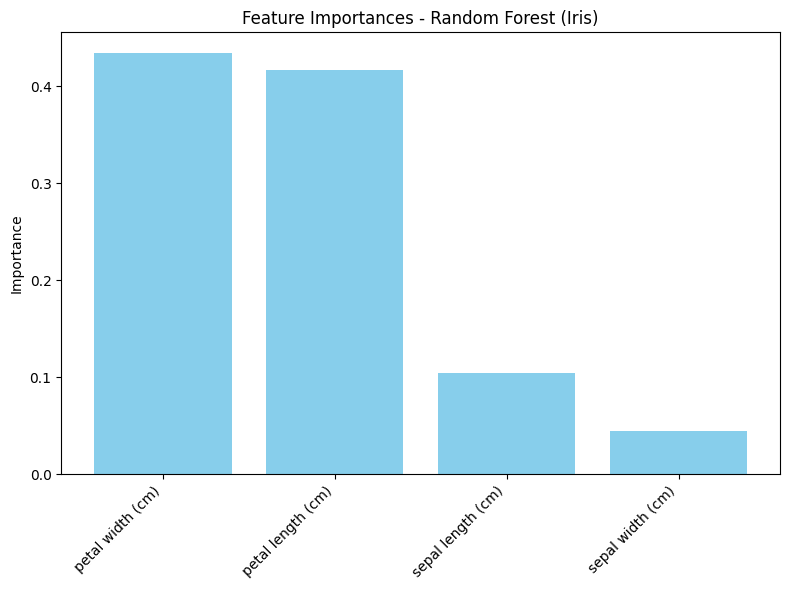

In [15]:
# Feature importances
feature_names = iris.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': iris_rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances - Random Forest (Iris)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Section B: PCA Projection and 2D Decision Boundaries

We now reduce the Iris dataset to 2 dimensions using PCA for visualization. Note that this 2D projection is only for visualization purposes and does not capture all the complexity in 4D.

For each method (single tree, bagging, Random Forest), we train a model on the 2D data and then plot the decision boundary.

In [16]:
from sklearn.decomposition import PCA

# Reduce the Iris dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Split the 2D data into train and test sets
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


Explained variance ratio: [0.87400908 0.12599092]


### Helper Function: Plot Decision Boundary (2D)

In [17]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", mesh_step=0.02):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                         np.arange(y_min, y_max, mesh_step))
    # Predict on each point of the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

### 1. Single Decision Tree (2D)
Train a decision tree on the PCA-reduced data and plot its decision boundary.

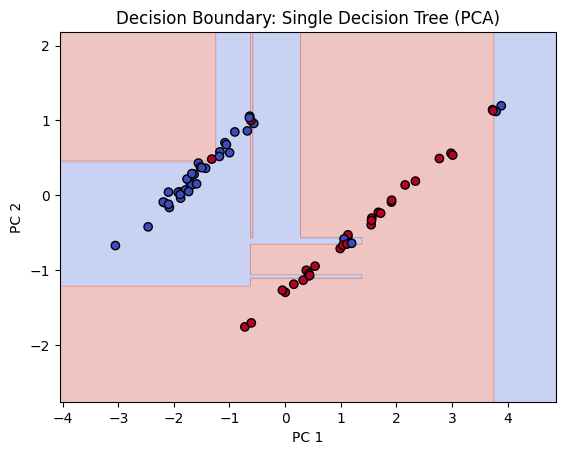

In [18]:
# Train a decision tree on the PCA-reduced data
pca_tree_clf = DecisionTreeClassifier(random_state=42)
pca_tree_clf.fit(X_pca_train, y_pca_train)

# Plot the decision boundary
plot_decision_boundary(pca_tree_clf, X_pca_train, y_pca_train, title="Decision Boundary: Single Decision Tree (PCA)")

#plot_decision_boundary()

### 2. Bagging Ensemble (2D)
Train a BaggingClassifier on the PCA-reduced data.

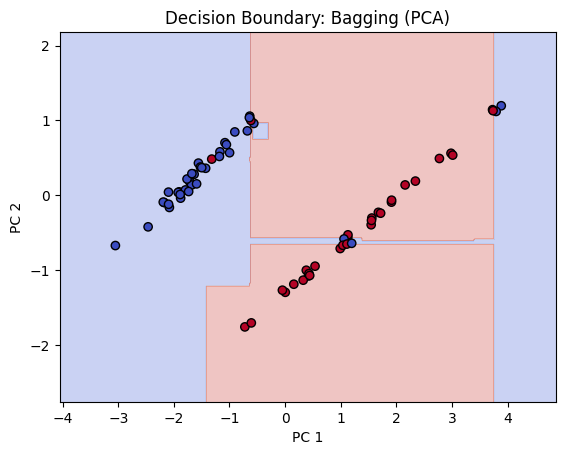

In [20]:
# Train a BaggingClassifier on the PCA-reduced data
pca_bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
pca_bagging_clf.fit(X_pca_train, y_pca_train)

# Plot the decision boundary
plot_decision_boundary(pca_bagging_clf, X_pca_train, y_pca_train, title="Decision Boundary: Bagging (PCA)")


### 3. Random Forest (2D)
Train a RandomForestClassifier on the PCA-reduced data, report scores, and plot decision boundaries.

Random Forest Accuracy (PCA): 0.7666666666666667


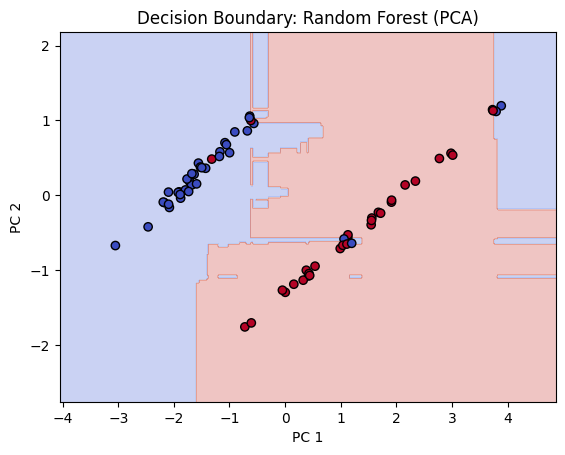

In [21]:
# Train a RandomForestClassifier on the PCA-reduced data
pca_rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    random_state=42
)
pca_rf_clf.fit(X_pca_train, y_pca_train)

# Report scores
y_pca_pred = pca_rf_clf.predict(X_pca_test)
accuracy_pca_rf = accuracy_score(y_pca_test, y_pca_pred)
print(f"Random Forest Accuracy (PCA): {accuracy_pca_rf}")

# Plot decision boundaries
plot_decision_boundary(pca_rf_clf, X_pca_train, y_pca_train, title="Decision Boundary: Random Forest (PCA)")
